In [1]:
#          ----------------------Table of Contents------------------------

# 9. Produsing charts to illustrate the results. 
# 10. Export dataframe. 

In [2]:
# Importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Importing dataframe
path = r'C:\Users\ztrim\06-2025 Instacart Basket Analysis'

In [4]:
path

'C:\\Users\\ztrim\\06-2025 Instacart Basket Analysis'

In [5]:
# Import df_active_anonymized from Exercise 4.10 - Part1 - Step 5 onwards1
df_active_anonymized = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_anonymized_step_4'))

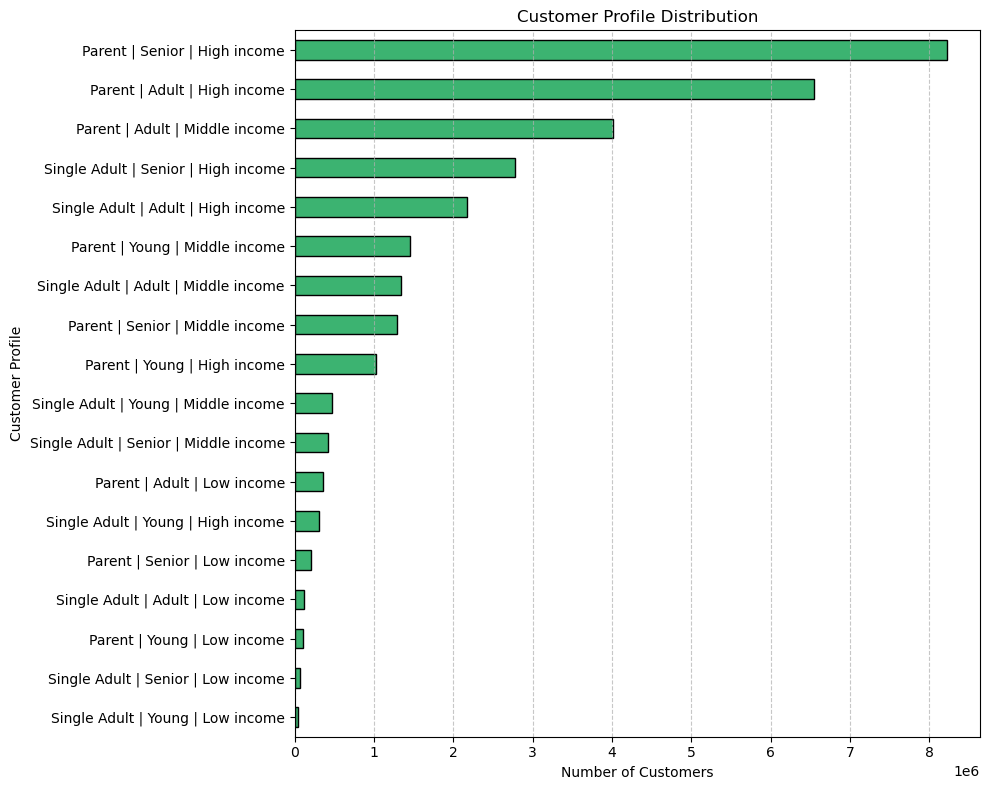

In [7]:
df_active_anonymized['customer_profile'].value_counts().sort_values().plot(
    kind='barh',
    figsize=(10, 8),
    color='mediumseagreen',
    edgecolor='black'
)
plt.title('Customer Profile Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Profile')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

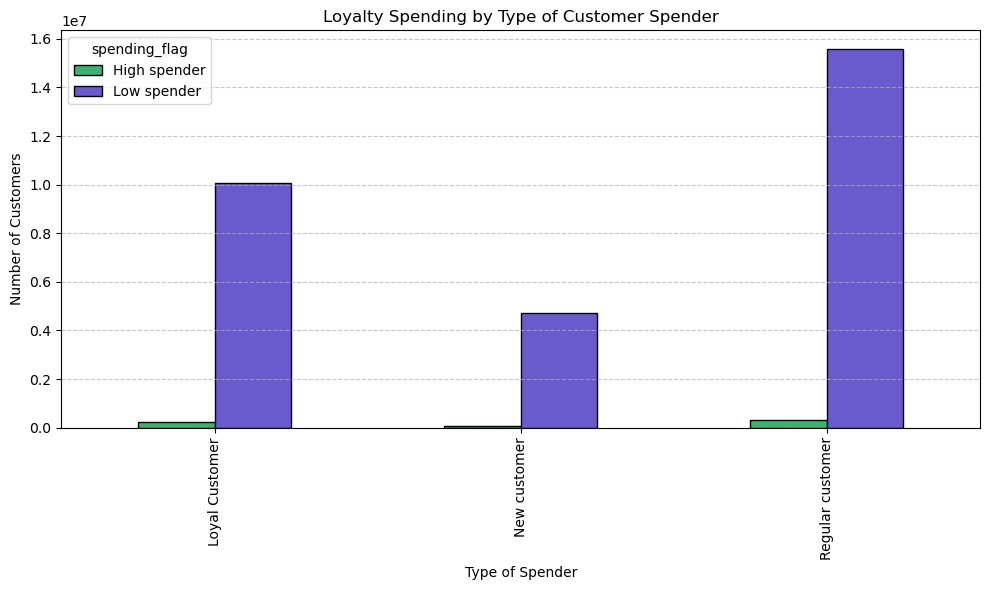

In [11]:
# Create a crosstab of Loyalty vs Spending
loyalty_spending = pd.crosstab(
    df_active_anonymized['loyalty_flag'], 
    df_active_anonymized['spending_flag']
)

# Plot the grouped bar chart with updated colors
loyalty_spending.plot(
    kind='bar', 
    figsize=(10, 6), 
    color=['mediumseagreen', 'slateblue'],  # Changed colors
    edgecolor='black'
)

plt.title('Loyalty Spending by Type of Customer Spender')
plt.xlabel('Type of Spender')
plt.ylabel('Number of Customers')
plt.legend(title='spending_flag')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Added department names to the dataset again (unsure what happened and why they were not there). 

In [32]:
df_departments_raw = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), header=None)

In [33]:
df_departments_t = df_departments_raw.T

In [34]:
df_departments_t.columns = df_departments_t.iloc[0]
df_departments_clean = df_departments_t.drop(index=0)

In [35]:
df_departments_clean.columns = ['department_id', 'department']
df_departments_clean['department_id'] = df_departments_clean['department_id'].astype(int)

In [36]:
df_active_anonymized['department_id'] = df_active_anonymized['department_id'].astype(int)
df_active_anonymized = df_active_anonymized.merge(df_departments_clean, on='department_id', how='left')

In [38]:
df_departments_clean.head()

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol


In [39]:
dept_counts = df_active_anonymized['department'].value_counts().head(10)

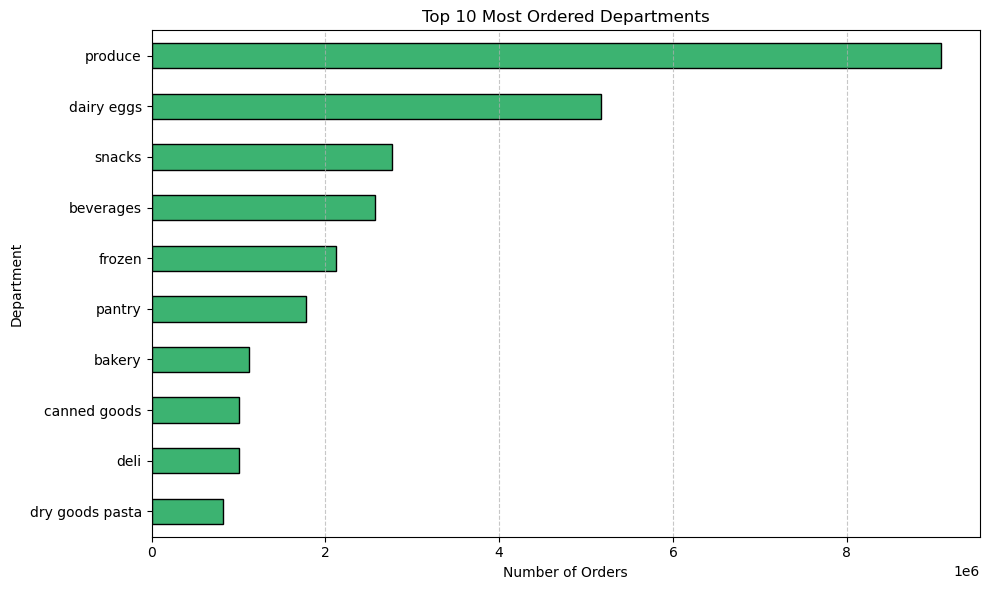

In [40]:
dept_counts.sort_values().plot(
    kind='barh',
    figsize=(10, 6),
    color='mediumseagreen',
    edgecolor='black'
)

plt.title('Top 10 Most Ordered Departments')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

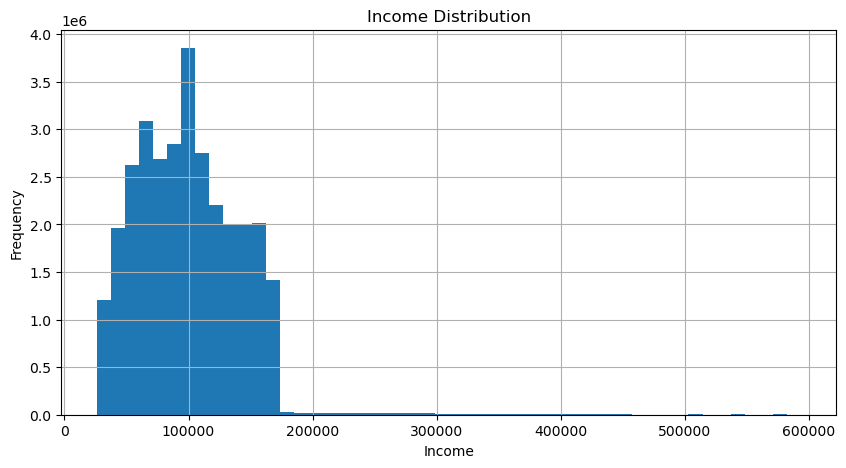

In [45]:

plt.figure(figsize=(10, 5))
plt.hist(df_active_anonymized['income'], bins=50)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

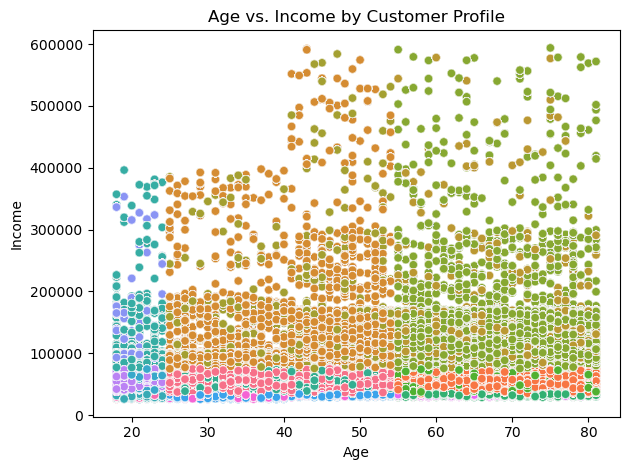

In [51]:
sns.scatterplot(
    data=df_active_anonymized,
    x='age',
    y='income',
    hue='customer_profile',
    alpha=0.5,
    legend=False  
)

plt.title('Age vs. Income by Customer Profile')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.show()